## Ejemplo 02
En este ejemplo vamos a mappear datos, para ello, vamos a avanzar por los pasos anteriores (para llegar al mismo estado). Para ello, haré todos los pasos en dos o tres celdas

In [1]:
import pandas as pd
import numpy as np
import json

with open("meteoritos.json","rt") as archivo:
    json_meteoritos = json.load(archivo)
    
df_meteoritos = pd.DataFrame.from_dict(json_meteoritos)
dataframe = df_meteoritos[['fall','id','mass','name','reclat','reclong']]

convert_dictionary= {
    'fall':str,
    'id':int,
    'mass':float,
    'name':str,
    'reclat':float,
    'reclong':float
}
df_converted = dataframe.astype(convert_dictionary)
df_converted.dtypes
df_converted = df_converted.dropna(how='any', axis=0)
df_converted = df_converted.reset_index()

In [2]:
def normalize(values, maxvalue, minvalue):
    norm_values = (values - minvalue) / (maxvalue - minvalue)
    return norm_values

In [3]:
mass_series = df_converted['mass']
max_mass = mass_series.max()
min_mass = mass_series.min()
numpy_mass = mass_series.to_numpy()
print("Valor máximo: "+str(max_mass)+
      ", valor mínimo: "+str(min_mass)+
      ", Num de valores a normalizar:"+str(len(numpy_mass)))
normalized_mass_np = normalize(numpy_mass, max_mass, min_mass)
print("Normalizado!")
print("Valores de "+str(np.min(normalized_mass_np))+" a "+str(np.max(normalized_mass_np)))
print(normalized_mass_np.shape)
normalized_df = pd.Series(normalized_mass_np,dtype = float, name="Normalized Mass")
df_normalized = df_converted.join(normalized_df)

Valor máximo: 23000000.0, valor mínimo: 0.15, Num de valores a normalizar:960
Normalizado!
Valores de 0.0 a 1.0
(960,)


### Mappeo de datos
Primero cargamos el histograma
(Esto puede tomar un poco de tiempo)

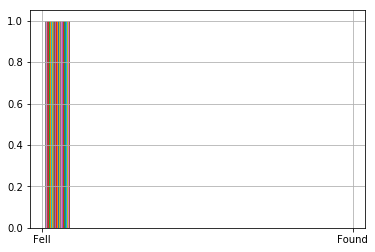

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

df_converted['fall'].hist()

Una vez creado el histograma, podemos ver que hay dos datos: Fell and found. Con ellos podemos mappear en 1 y 0 de la siguiente forma:

In [5]:
diccionario_mappeo = {
    'Fell':1,
    'Found':0
}

df_mapped = df_converted['fall'].map(diccionario_mappeo)
df_mapped

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
930    1
931    1
932    1
933    1
934    1
935    1
936    1
937    1
938    1
939    1
940    1
941    1
942    1
943    1
944    1
945    1
946    1
947    1
948    1
949    1
950    1
951    1
952    1
953    1
954    1
955    1
956    1
957    1
958    1
959    1
Name: fall, Length: 960, dtype: int64